# Gaussian Naive Bayes Demo with Iris Dataset

This notebook demonstrates the usage of our Gaussian Naive Bayes implementation on the Iris dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

from naive_bayes import GaussianNaiveBayes

## Load and Prepare Data

In [2]:
# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (120, 4)
Testing set shape: (30, 4)


## Train and Evaluate Gaussian Naive Bayes Model

In [3]:
# Initialize and train the model
gnb = GaussianNaiveBayes()
gnb.fit(X_train_scaled, y_train)

# Make predictions
y_pred = gnb.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


## Visualize Results

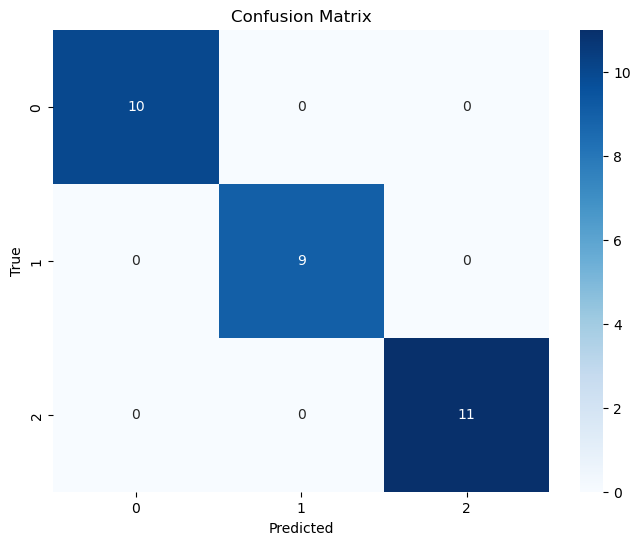

In [4]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Visualize Decision Boundaries (2D)

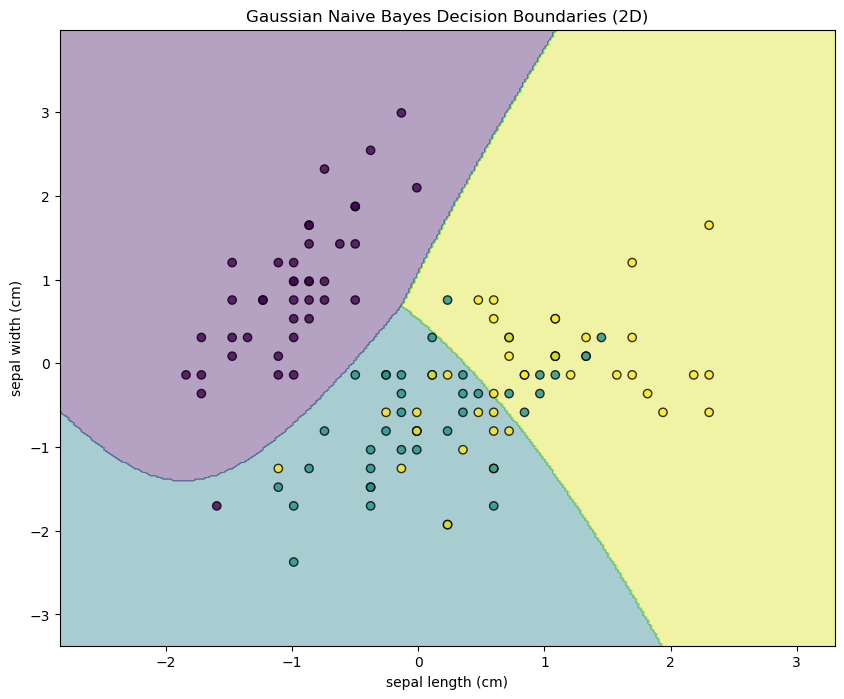

In [5]:
# Select two features for visualization
feature1, feature2 = 0, 1  # First two features

# Create mesh grid
x_min, x_max = X_train_scaled[:, feature1].min() - 1, X_train_scaled[:, feature1].max() + 1
y_min, y_max = X_train_scaled[:, feature2].min() - 1, X_train_scaled[:, feature2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Create a temporary model for 2D visualization
gnb_2d = GaussianNaiveBayes()
X_train_2d = X_train_scaled[:, [feature1, feature2]]
gnb_2d.fit(X_train_2d, y_train)

# Predict for each point in the mesh grid
Z = gnb_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_scaled[:, feature1], X_train_scaled[:, feature2], 
            c=y_train, alpha=0.8, edgecolors='k')
plt.title('Gaussian Naive Bayes Decision Boundaries (2D)')
plt.xlabel(iris.feature_names[feature1])
plt.ylabel(iris.feature_names[feature2])
plt.show()

## Visualize Class Probabilities

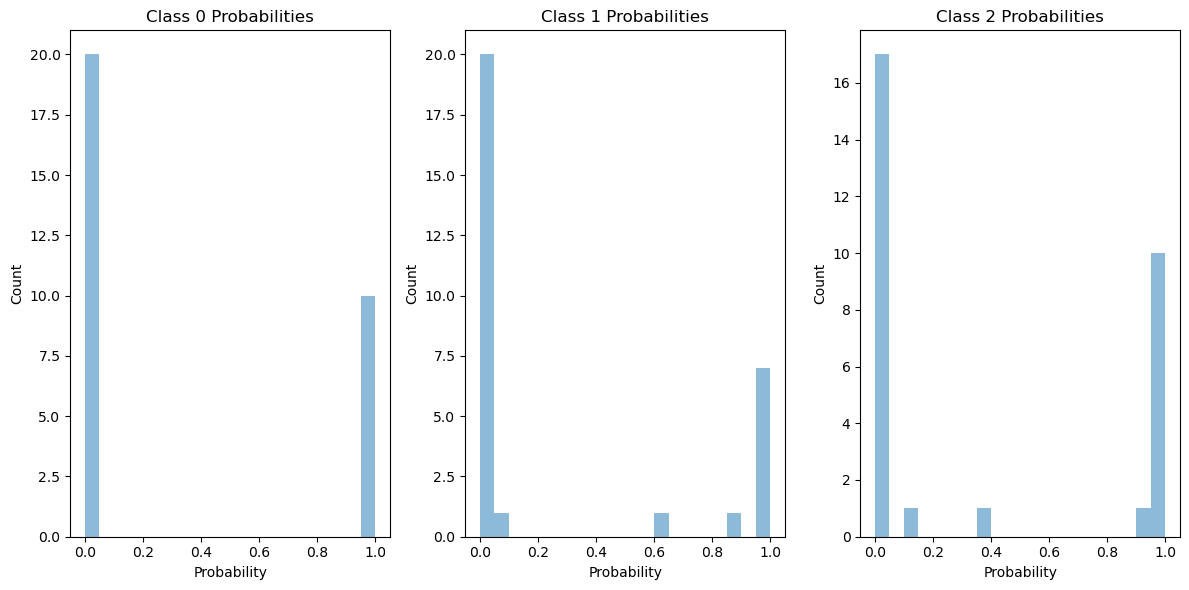

In [6]:
# Get probability estimates for test set
y_probs = gnb.predict_proba(X_test_scaled)

# Plot probability distributions for each class
plt.figure(figsize=(12, 6))
for i in range(3):  # 3 classes in Iris dataset
    plt.subplot(1, 3, i+1)
    plt.hist(y_probs[:, i], bins=20, alpha=0.5)
    plt.title(f'Class {i} Probabilities')
    plt.xlabel('Probability')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()